In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 读取训练数据
train_data = pd.read_csv('train.csv')

# 查看数据基本信息
print("数据集形状:", train_data.shape)
print("\n前几行数据:")
print(train_data.head())
print("\n数据基本信息:")
print(train_data.info())
print("\n数据统计描述:")
print(train_data.describe())

# 检查缺失值
print("\n缺失值统计:")
print(train_data.isnull().sum())

数据集形状: (404, 14)

前几行数据:
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0   0.05188   0.0   4.49   0.0  0.449  6.015   45.1  4.4272   3.0  247.0   
1   0.04590  52.5   5.32   0.0  0.405  6.315   45.6  7.3172   6.0  293.0   
2  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
3   0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
4   0.05735   0.0   4.49   0.0  0.449  6.630   56.1  4.4377   3.0  247.0   

   PTRATIO       B  LSTAT  MEDV  
0     18.5  395.99  12.86  22.5  
1     16.6  396.90   7.60  22.3  
2     20.2  131.42  13.33  23.1  
3     21.0  387.94  12.80  18.4  
4     18.5  392.30   6.53  26.6  

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS 

/Users/mfyx/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families wer

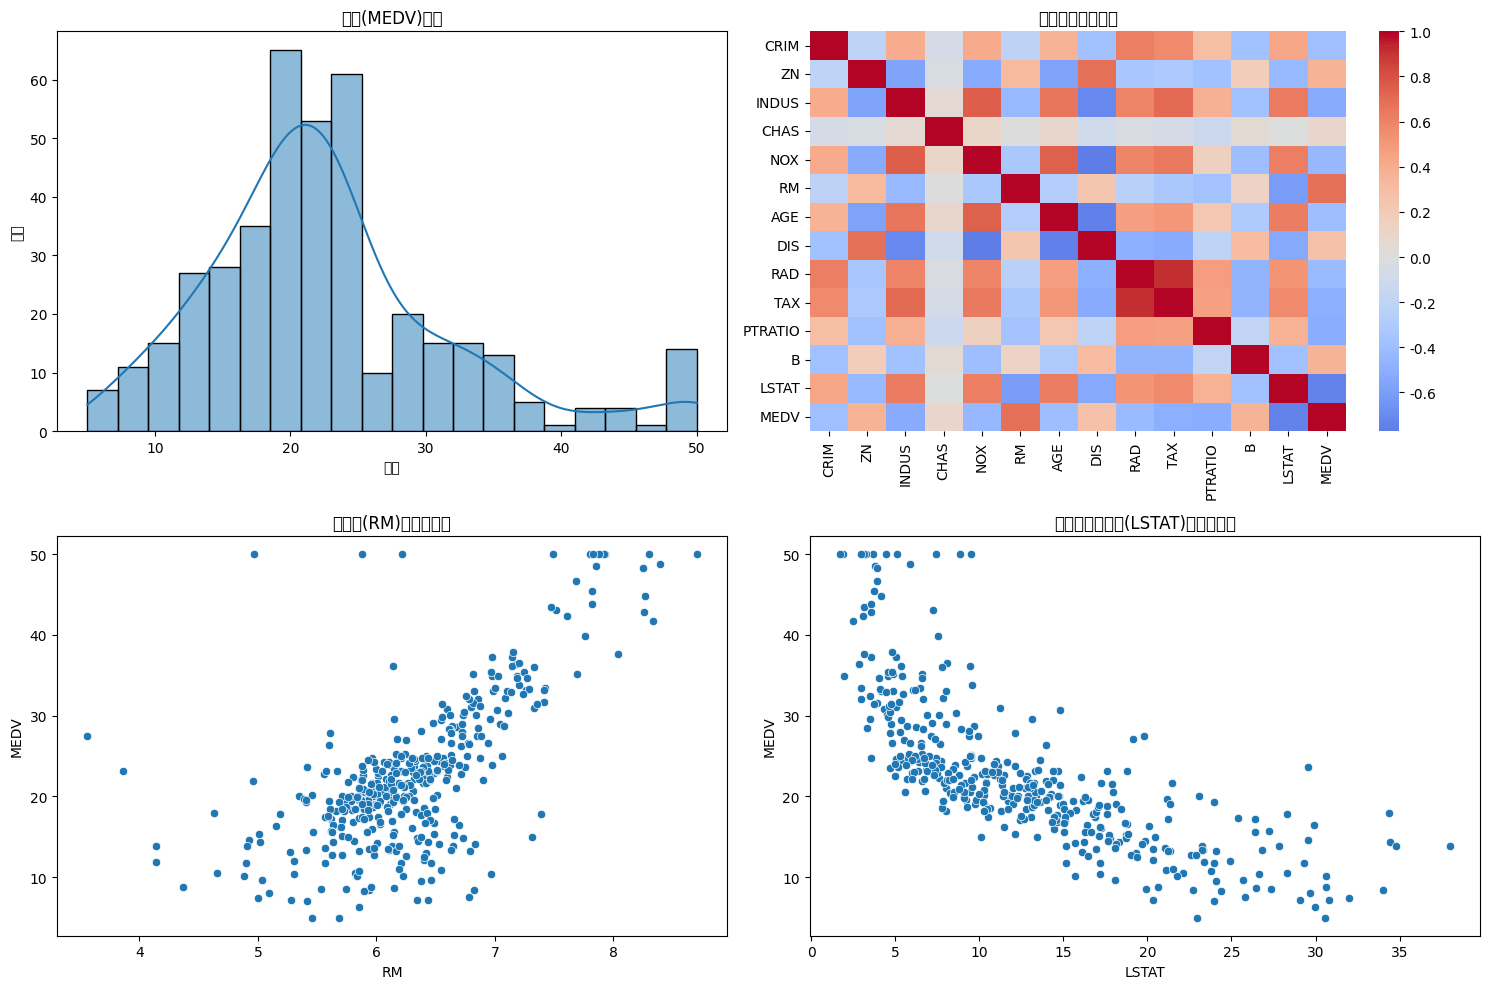


与房价相关性最强的特征:
MEDV       1.000000
RM         0.683318
B          0.358440
ZN         0.357914
DIS        0.266834
CHAS       0.099078
CRIM      -0.394327
AGE       -0.399760
RAD       -0.424330
NOX       -0.443459
TAX       -0.508129
PTRATIO   -0.511823
INDUS     -0.525643
LSTAT     -0.738023
Name: MEDV, dtype: float64


In [5]:
# 设置中文显示
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建一个图形，包含多个子图
plt.figure(figsize=(15, 10))

# 1. 目标变量分布
plt.subplot(2, 2, 1)
sns.histplot(train_data['MEDV'], kde=True)
plt.title('房价(MEDV)分布')
plt.xlabel('房价')
plt.ylabel('频数')

# 2. 相关性热力图
plt.subplot(2, 2, 2)
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('特征相关性热力图')

# 3. 重要特征与目标变量的散点图
plt.subplot(2, 2, 3)
sns.scatterplot(data=train_data, x='RM', y='MEDV')
plt.title('房间数(RM)与房价关系')

plt.subplot(2, 2, 4)
sns.scatterplot(data=train_data, x='LSTAT', y='MEDV')
plt.title('低收入人群占比(LSTAT)与房价关系')

plt.tight_layout()
plt.show()

# 打印与目标变量相关性最强的特征
correlations = correlation_matrix['MEDV'].sort_values(ascending=False)
print("\n与房价相关性最强的特征:")
print(correlations)

In [6]:
# 特征工程
def feature_engineering(data):
    # 1. 创建特征副本
    df = data.copy()
    
    # 2. 创建新特征
    # 房间数的平方（捕捉非线性关系）
    df['RM_sq'] = df['RM'] ** 2
    # LSTAT的对数（处理偏态）
    df['LSTAT_log'] = np.log1p(df['LSTAT'])
    # 距离的对数
    df['DIS_log'] = np.log1p(df['DIS'])
    
    # 3. 特征交互
    df['RM_LSTAT'] = df['RM'] * df['LSTAT']
    
    # 4. 标准化数值特征
    scaler = StandardScaler()
    numeric_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 
                       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 
                       'RM_sq', 'LSTAT_log', 'DIS_log', 'RM_LSTAT']
    
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    return df, scaler

# 应用特征工程到训练数据
train_processed, scaler = feature_engineering(train_data)

print("处理后的特征:", train_processed.columns.tolist())
print("\n处理后的数据形状:", train_processed.shape)

处理后的特征: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'RM_sq', 'LSTAT_log', 'DIS_log', 'RM_LSTAT']

处理后的数据形状: (404, 18)


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# 准备训练数据
X = train_processed.drop(['MEDV', 'CHAS'], axis=1)  # CHAS是二元特征，暂时不用
y = train_processed['MEDV']

# 定义要测试的模型
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# 使用交叉验证评估各个模型
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'\n{name}:')
    print(f'RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})')
    
    # R2 score
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'R2: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})')

# 选择表现最好的模型进行优化（这里假设是XGBoost）
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 3]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X, y)

print("\n最佳参数:", grid_search.best_params_)
print("最佳RMSE:", np.sqrt(-grid_search.best_score_))

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_

# 读取测试数据
test_data = pd.read_csv('test.csv')
test_processed, _ = feature_engineering(test_data)  # 使用之前的scaler

# 准备测试数据
#X_test = test_processed.drop(['MEDV', 'CHAS'], axis=1)
X_test = test_processed.drop(['MEDV', 'CHAS', 'idx'], axis=1)  # 添加'idx'到drop列表中

# 预测
predictions = best_model.predict(X_test)

# 将预测结果添加到测试数据中
test_data['MEDV'] = predictions

# 按idx排序
test_data = test_data.sort_values('idx')

# 保存预测结果
test_data.to_csv('test_predictions.csv', index=False)

print("\n预测完成，结果已保存到 test_predictions.csv")


Linear Regression:
RMSE: 3.8544 (+/- 0.9854)
R2: 0.8046 (+/- 0.1358)

Ridge:
RMSE: 3.8105 (+/- 0.9518)
R2: 0.8112 (+/- 0.1234)

Lasso:
RMSE: 4.8846 (+/- 0.8870)
R2: 0.6995 (+/- 0.1268)

Random Forest:
RMSE: 3.1596 (+/- 0.5873)
R2: 0.8715 (+/- 0.0783)

Gradient Boosting:
RMSE: 2.9162 (+/- 0.4422)
R2: 0.8900 (+/- 0.0623)

XGBoost:
RMSE: 3.3326 (+/- 0.6958)
R2: 0.8606 (+/- 0.0501)
Fitting 5 folds for each of 24 candidates, totalling 120 fits

最佳参数: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200}
最佳RMSE: 3.0841058090700355

预测完成，结果已保存到 test_predictions.csv


In [10]:
# 保存原始MEDV值
original_medv = train_data['MEDV'].copy()

# 假装MEDV不存在，重新预测训练集
train_data_for_pred = train_data.copy()
train_processed_for_pred, _ = feature_engineering(train_data_for_pred)

# 准备数据
X_train_pred = train_processed_for_pred.drop(['MEDV', 'CHAS'], axis=1)

# 使用最佳模型预测
train_predictions = best_model.predict(X_train_pred)

# 将预测结果添加到训练数据中
train_data_for_pred['MEDV'] = train_predictions

# 保存预测结果
train_data_for_pred.to_csv('train_predictions.csv', index=False)

# 计算RMSE
train_rmse = np.sqrt(mean_squared_error(original_medv, train_predictions))
print(f"\n训练集上的RMSE: {train_rmse:.4f}")


训练集上的RMSE: 0.9521
